# Определение перспективного тарифа для телеком компании "Мегалайн"

#### Учебный проект №3 | Выполнил: Сергей Киреев

## Введение

Клиентам федерального оператора сотовой связи "Мегалайн" предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, нужно понять, какой тариф приносит больше денег.

В данном проекте будет выполнен предварительный анализ тарифов на небольшой выборке клиентов. Я имею данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Попробую проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

##### Описание тарифов
Тариф «Смарт»

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

Внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

#### Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math

# будем отображать графики прямо в jupyter'e
%matplotlib inline

#графики в svg выглядят более четкими
#%config InlineBackend.figure_format = 'svg' 

## Шаг 1 – Знакомство с данными

In [4]:
#Сохраняем содержимое исходных CSV в DataFrame
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [5]:
# #Сохраняем содержимое исходных CSV в DataFrame
# df_calls = pd.read_csv('Desktop/Анализ данных – Яндекс Практикум/Проект №3/calls.csv')
# df_internet = pd.read_csv('Desktop/Анализ данных – Яндекс Практикум/Проект №3/internet.csv')
# df_messages = pd.read_csv('Desktop/Анализ данных – Яндекс Практикум/Проект №3/messages.csv')
# df_tariffs = pd.read_csv('Desktop/Анализ данных – Яндекс Практикум/Проект №3/tariffs.csv')
# df_users = pd.read_csv('Desktop/Анализ данных – Яндекс Практикум/Проект №3/users.csv')

In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
df_internet.info()
df_internet.query('mb_used == 0').copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
#df_users – дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
df_users.info()
df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


#### Вывод
В данных много нулевых значений. Есть пропуски. Во всех датафреймах требуется замена типа данных в столбце хранящем дату. В общем качество данных, на первый взгляд – приемлимое.

## Шаг 2 – Предобработка данных

Считаю, что признак duration = 0 в датафрейме df_calls, означает, что звонок не состоялся, клиент не дозвонился.
Признак mb_used = 0 в датафрейме df_internet, означает что подключение было, но абонет не пользовался интернетом.
Если их удалить, мне кажется, это не повлияет на оценку тарифа. Удаляем.

In [11]:
#Удаляем нелевые значения минут и мегабайт
df_calls = df_calls.query('duration != 0')
df_internet = df_internet.query('mb_used != 0')

In [12]:
#Преобразуем дату из строки в формат datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [13]:
#Округлим значения минут и мегабайтов до целых значений в большую сторону
df_calls['duration'] = df_calls['duration'].apply(math.ceil).astype('int')
df_internet['mb_used'] = df_internet['mb_used'].apply(math.ceil).astype('int')

#### Сделаем сводные таблицы по звонкам сообщениям и интернет-трафику по месяцам

In [14]:
#Добавим новый столбец с номером месяца в таблицы 
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [15]:
#Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя
calls_pivot = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
calls_pivot.columns = ['total_calls','sum_duration']

In [16]:
#Посчитаем количество сообщений по месяцам для каждого пользователя
messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_pivot.columns = ['total_messages']

In [17]:
#Посчитаем объём израсходованного интернет-трафика по месяцам для каждого пользователя
internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_pivot.columns = ['total_internet_traffic']

In [1]:
#Склеиваем звонки, сообщения и интернет в общую таблицу по столбцу user_id
df_common = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer')
df_common = df_common.merge(internet_pivot, on=['user_id', 'month'], how='outer')

#а теперь применим черные приёмчики
df_users.index = df_users['user_id']
df_common = pd.merge(df_common, df_users['tariff'], left_index=True, right_index=True)
df_common = pd.merge(df_common, df_users['city'], left_index=True, right_index=True)
df_common.columns = ['total_calls', 'sum_duration', 'total_messages',
       'total_internet_traffic', 'user_tariff', 'city']

NameError: name 'calls_pivot' is not defined

In [162]:
print('Размеры датафреймов до слияния')
print('calls_pivot',calls_pivot.shape)
print('messages_pivot', messages_pivot.shape)
print('internet_pivot', internet_pivot.shape)
print()
print()
print('Размеры датафрейма после слияния')
print(df_common.shape)


Размеры датафреймов до слияния
calls_pivot (3168, 2)
messages_pivot (2717, 1)
internet_pivot (3201, 1)


Размеры датафрейма после слияния
(3168, 7)


In [85]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [136]:
#Сделаем функцию, которая будет считать выручку с каждого пользователя (тариф ULTRA)

def total_revenue(row):
    
    if row['user_tariff'] == 'ultra':
    
        #Посчитаем сколько минут сверх лимита наговорил юзер
        remaning_duration = row['sum_duration'] - df_tariffs.loc[1,'minutes_included']
        #Если минут сверх лимита нет, значит переплата 0, иначе умножаем количество минут на стоимость 1 минуты
        if remaning_duration > 0:
            over_duration_rub = remaning_duration * df_tariffs.loc[1,'rub_per_minute']
        else:
            over_duration_rub = 0

        #Посчитаем сколько сообщений сверх лимита наотправлял юзер
        remaning_messages = row['total_messages'] - df_tariffs.loc[1,'messages_included']
        if remaning_messages > 0:
            over_message_rub = remaning_messages * df_tariffs.loc[1,'rub_per_message']
        else:
            over_message_rub = 0

        #Посчитаем сколько трафика перебрал юзер
        remaning_internet = row['total_internet_traffic'] - df_tariffs.loc[1,'mb_per_month_included']
        if remaning_internet > 0:
            over_internet_rub = ((remaning_internet / 1024)*df_tariffs.loc[1,'rub_per_gb'])
        else:
            over_internet_rub = 0

        #Складываем перерасходы, добавляем абонентскую плату
        total_revenue_ultra = over_duration_rub + over_message_rub + over_internet_rub + df_tariffs.loc[1,'rub_monthly_fee']
        return int(total_revenue_ultra)
    
    else:
        
        #Посчитаем сколько минут сверх лимита наговорил юзер
        remaning_duration = row['sum_duration'] - df_tariffs.loc[0,'minutes_included']
        #Если минут сверх лимита нет, значит переплата 0, иначе умножаем количество минут на стоимость 1 минуты
        if remaning_duration > 0:
            over_duration_rub = remaning_duration * df_tariffs.loc[0,'rub_per_minute']
        else:
            over_duration_rub = 0

        #Посчитаем сколько сообщений сверх лимита наотправлял юзер
        remaning_messages = row['total_messages'] - df_tariffs.loc[0,'messages_included']
        if remaning_messages > 0:
            over_message_rub = remaning_messages * df_tariffs.loc[0,'rub_per_message']
        else:
            over_message_rub = 0

        #Посчитаем сколько трафика перебрал юзер
        remaning_internet = row['total_internet_traffic'] - df_tariffs.loc[0,'mb_per_month_included']
        if remaning_internet > 0:
            over_internet_rub = ((remaning_internet / 1024)*df_tariffs.loc[0,'rub_per_gb'])
        else:
            over_internet_rub = 0

        #Складываем перерасходы, добавляем абонентскую плату
        total_revenue_smart = over_duration_rub + over_message_rub + over_internet_rub + df_tariffs.loc[0,'rub_monthly_fee']
        return int(total_revenue_smart)

In [140]:
#Из-за группировки  появились NaN в стобцах total_messages total_internet_traffic, 
#значит в некоторые месяцы люди звонили, но не писали СМС и не пользовались интернетом
df_common = df_common.fillna(0)

In [146]:
df_common['total_revenue'] = df_common.apply(total_revenue, axis=1)
df_common['total_internet_traffic'] = df_common['total_internet_traffic'].apply(math.ceil).astype('int')
df_common['total_messages'] = df_common['total_messages'].apply(math.ceil).astype('int')
df_common

total_calls  sum_duration  total_messages  \
user_id month                                              
1000    5               17           159              22   
        6               28           172              60   
        7               41           340              75   
        8               42           408              81   
        9               46           466              57   
...                    ...           ...             ...   
1498    10              30           247              42   
1499    9                8            70              11   
        10              44           449              48   
        11              62           612              59   
        12              56           492              66   

               total_internet_traffic user_tariff         city  total_revenue  
user_id month                                                                  
1000    5                        2256       ultra    Краснодар           1950  
        6                       23257       ultra    Краснодар           1950  
        7                       14016       ultra    Краснодар           1950  
        8                       14070       ultra    Краснодар           1950  
        9                       14581       ultra    Краснодар           1950  
...                               ...         ...          ...            ...  
1498    10                      20604       smart  Владикавказ           1574  
1499    9                        1848       smart        Пермь            550  
        10                      17809       smart        Пермь           1028  
        11                      17984       smart        Пермь           1425  
        12                      13077       smart        Пермь            598  

[3168 rows x 7 columns]

## Шаг 3 – Анализ данных

In [147]:
df_common_smart = df_common.query('user_tariff == "smart"')
df_common_ultra = df_common.query('user_tariff == "ultra"')

Тариф smart, длительность разговора по месяцам

Среднее = 419
Дисперсия = 35718
Стандартное отклонение = 188


Тариф ultra, длительность разговора по месяцам

Среднее = 547
Дисперсия = 93338
Стандартное отклонение = 305


Text(0.5, 1.0, 'Распределение суммарной месячной длительности разговоров в зависимости от тарифа')

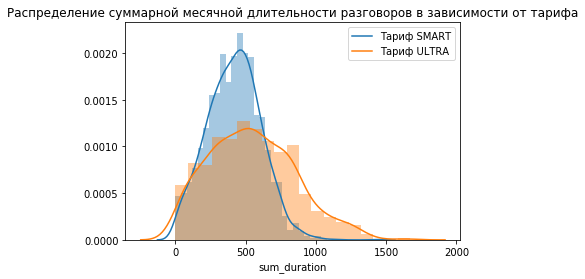

In [148]:
print('Тариф smart, длительность разговора по месяцам')
print()
mean = df_common_smart['sum_duration'].mean()
print('Среднее =', int(mean))

variance_estimate = np.var(df_common_smart['sum_duration'], ddof=1)
print('Дисперсия =', int(variance_estimate))

standard_deviation = np.sqrt(variance_estimate)
print('Стандартное отклонение =', int(standard_deviation))
print()
print()
print('Тариф ultra, длительность разговора по месяцам')
print()
mean = df_common_ultra['sum_duration'].mean()
print('Среднее =', int(mean))

variance_estimate = np.var(df_common_ultra['sum_duration'], ddof=1)
print('Дисперсия =', int(variance_estimate))

standard_deviation = np.sqrt(variance_estimate)
print('Стандартное отклонение =', int(standard_deviation))


sns.distplot(df_common_smart['sum_duration'], kde_kws = {'label':'Тариф SMART'})
sns.distplot(df_common_ultra['sum_duration'], kde_kws = {'label':'Тариф ULTRA'})
plt.title('Распределение суммарной месячной длительности разговоров в зависимости от тарифа')

Тариф smart, месячное количество сообщений

Среднее = 33
Дисперсия = 799
Стандартное отклонение = 28


Тариф ultra, месячное количество сообщений

Среднее = 48
Дисперсия = 2171
Стандартное отклонение = 46


Text(0.5, 1.0, 'Распределение месячного количества сообщений в зависимости от тарифа')

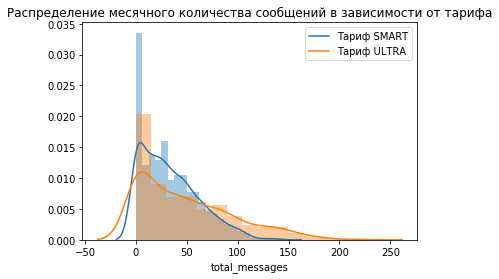

In [149]:
print('Тариф smart, месячное количество сообщений')
print()
mean = df_common_smart['total_messages'].mean()
print('Среднее =', int(mean))

variance_estimate = np.var(df_common_smart['total_messages'], ddof=1)
print('Дисперсия =', int(variance_estimate))

standard_deviation = np.sqrt(variance_estimate)
print('Стандартное отклонение =', int(standard_deviation))
print()
print()
print('Тариф ultra, месячное количество сообщений')
print()
mean = df_common_ultra['total_messages'].mean()
print('Среднее =', int(mean))

variance_estimate = np.var(df_common_ultra['total_messages'], ddof=1)
print('Дисперсия =', int(variance_estimate))

standard_deviation = np.sqrt(variance_estimate)
print('Стандартное отклонение =', int(standard_deviation))


sns.distplot(df_common_smart['total_messages'], kde_kws = {'label':'Тариф SMART'})
sns.distplot(df_common_ultra['total_messages'], kde_kws = {'label':'Тариф ULTRA'})
plt.title('Распределение месячного количества сообщений в зависимости от тарифа')

Тариф smart, месячный объёма интернет-трафика

Среднее = 16231
Дисперсия = 34614950
Стандартное отклонение = 5883


Тариф ultra, месячный объёма интернет-трафика

Среднее = 19489
Дисперсия = 102759496
Стандартное отклонение = 10137


Text(0.5, 1.0, 'Распределение месячного объёма интернет-трафика в зависимости от тарифа')

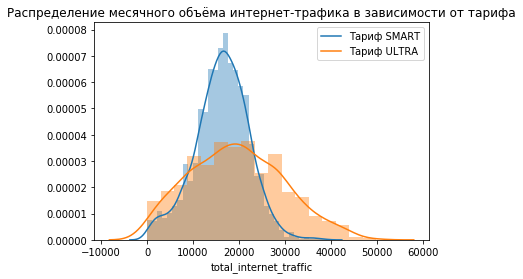

In [150]:
print('Тариф smart, месячный объёма интернет-трафика')
print()
mean = df_common_smart['total_internet_traffic'].mean()
print('Среднее =', int(mean))

variance_estimate = np.var(df_common_smart['total_internet_traffic'], ddof=1)
print('Дисперсия =', int(variance_estimate))

standard_deviation = np.sqrt(variance_estimate)
print('Стандартное отклонение =', int(standard_deviation))
print()
print()


print('Тариф ultra, месячный объёма интернет-трафика')
print()
mean = df_common_ultra['total_internet_traffic'].mean()
print('Среднее =', int(mean))

variance_estimate = np.var(df_common_ultra['total_internet_traffic'], ddof=1)
print('Дисперсия =', int(variance_estimate))

standard_deviation = np.sqrt(variance_estimate)
print('Стандартное отклонение =', int(standard_deviation))


sns.distplot(df_common_smart['total_internet_traffic'], kde_kws = {'label':'Тариф SMART'})
sns.distplot(df_common_ultra['total_internet_traffic'], kde_kws = {'label':'Тариф ULTRA'})
plt.title('Распределение месячного объёма интернет-трафика в зависимости от тарифа')

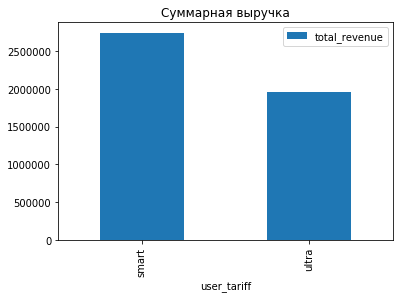

In [151]:
df_common.pivot_table(index='user_tariff', 
                      values='total_revenue', 
                      aggfunc='sum').plot(kind='bar', title='Суммарная выручка')

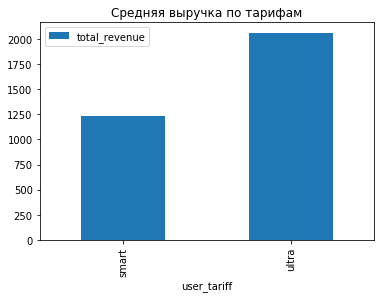

In [152]:
df_common.pivot_table(index='user_tariff', values='total_revenue', aggfunc='mean').plot(kind='bar', title='Средняя выручка по тарифам')

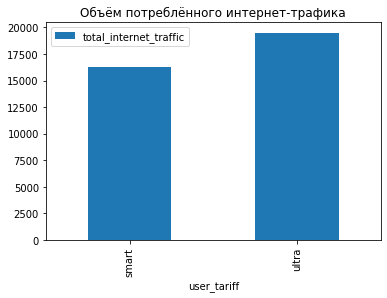

In [153]:
df_common.pivot_table(index='user_tariff', values='total_internet_traffic', aggfunc='mean').plot(kind='bar', title='Объём потреблённого интернет-трафика')

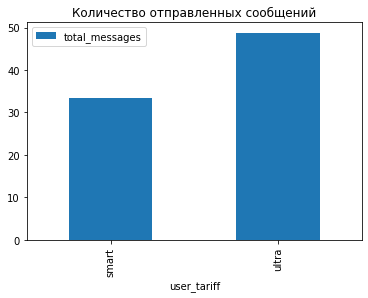

In [154]:
df_common.pivot_table(index='user_tariff', values='total_messages', aggfunc='mean').plot(kind='bar', title='Количество отправленных сообщений')

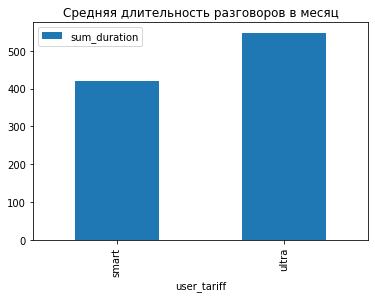

In [155]:
df_common.pivot_table(index='user_tariff', 
                      values='sum_duration', 
                      aggfunc='mean').plot(kind='bar', title='Средняя длительность разговоров в месяц')

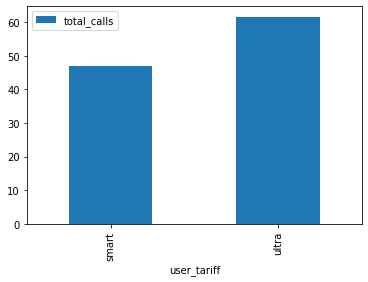

In [156]:
df_common.pivot_table(index='user_tariff', values='total_calls', aggfunc='mean').plot(kind='bar', title='')

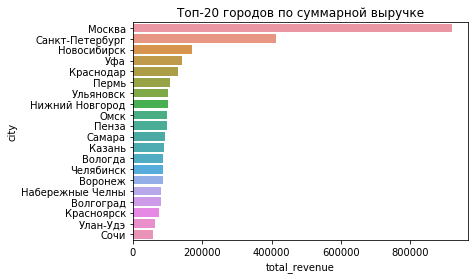

In [157]:
city_revenue = df_common.pivot_table(index='city', 
                      values='total_revenue', aggfunc='sum').sort_values(by='total_revenue', 
                                                                         ascending=False).head(20)

plt.title('Топ-20 городов по суммарной выручке')
sns.barplot(y=city_revenue.index, x='total_revenue', data = city_revenue, orient='h')

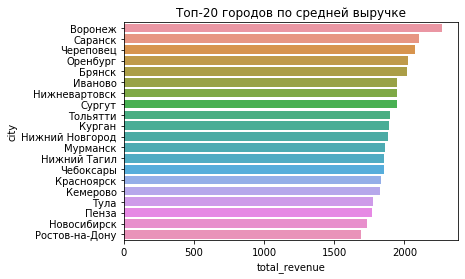

In [158]:
city_revenue = df_common.pivot_table(index='city', 
                      values='total_revenue', aggfunc='mean').sort_values(by='total_revenue', 
                                                                         ascending=False).head(20)

plt.title('Топ-20 городов по средней выручке')
sns.barplot(y=city_revenue.index, x='total_revenue', data = city_revenue, orient='h')

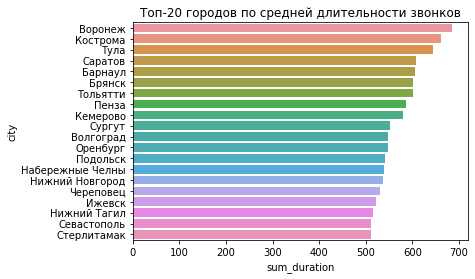

In [159]:
city_duration = df_common.pivot_table(index='city', values='sum_duration',
                      aggfunc='mean').sort_values(by='sum_duration', 
                                                 ascending=False).head(20)

plt.title('Топ-20 городов по средней длительности звонков')
sns.barplot(y=city_duration.index, x='sum_duration', data = city_duration, orient='h')

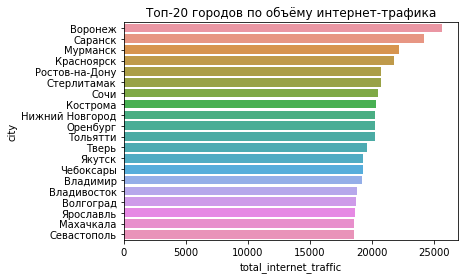

In [160]:
city_internet = df_common.pivot_table(index='city', values='total_internet_traffic', 
                      aggfunc='mean').sort_values(by='total_internet_traffic', 
                                                 ascending=False).head(20)

plt.title('Топ-20 городов по объёму интернет-трафика')
sns.barplot(y=city_internet.index, x='total_internet_traffic', data = city_internet, orient='h')

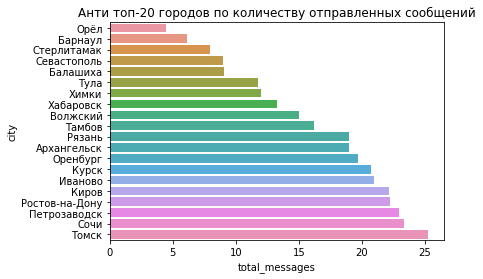

In [220]:
city_messages = df_common.pivot_table(index='city', values='total_messages', 
                      aggfunc='mean').sort_values(by='total_messages', 
                                                 ascending=True).head(20)

plt.title('Анти топ-20 городов по количеству отправленных сообщений')
sns.barplot(y=city_messages.index, x='total_messages', data = city_messages, orient='h')

In [260]:
smart_users = df_common.query('user_tariff == "smart"')
ultra_users = df_common.query('user_tariff == "ultra"')

#Функция сравнивает количество превышений значения в столбце сверх лимита
def over_couter(column, include_limit):
    counter = 0
    for row in column:
        if row > include_limit:
            counter += 1
    return counter

In [261]:
print('Из', len(smart_users.index), 
      'пользователей SMART, не хватает минут', 
      over_couter(smart_users['sum_duration'], df_tariffs.loc[0,'minutes_included']), 
      'пользователям')

print('Из', len(ultra_users.index), 
      'пользователей ULTRA, не хватает минут', 
      over_couter(ultra_users['sum_duration'], df_tariffs.loc[1,'minutes_included']), 
      'пользователям')

Из 2221 пользователей SMART, не хватает минут 754 пользователям
Из 947 пользователей ULTRA, не хватает минут 0 пользователям


In [262]:
print('Из', len(smart_users.index), 
      'пользователей SMART, не хватает пакета сообщений', 
      over_couter(smart_users['total_messages'], df_tariffs.loc[0,'messages_included']), 
      'пользователям')

print('Из', len(ultra_users.index), 
      'пользователей ULTRA, не хватает пакета сообщений', 
      over_couter(ultra_users['total_messages'], df_tariffs.loc[1,'messages_included']), 
      'пользователям')

Из 2221 пользователей SMART, не хватает пакета сообщений 564 пользователям
Из 947 пользователей ULTRA, не хватает пакета сообщений 0 пользователям


In [259]:
print('Из', len(smart_users.index), 
      'пользователей SMART, не хватает пакета сообщений', 
      over_couter(smart_users['total_internet_traffic'], df_tariffs.loc[0,'mb_per_month_included']), 
      'пользователям')

print('Из', len(ultra_users.index), 
      'пользователей ULTRA, не хватает пакета сообщений', 
      over_couter(ultra_users['total_internet_traffic'], df_tariffs.loc[1,'mb_per_month_included']), 
      'пользователям')

Из 2221 пользователей SMART, не хватает пакета сообщений 1304 пользователям
Из 947 пользователей ULTRA, не хватает пакета сообщений 128 пользователям


## Шаг 4 – Проверка гипотез

На проверку выдвигаются гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

### Проверка гипотезы №1, выдвигаем нулевую гипотезу H0:  средняя выручка у пользователей тарифов «Ультра» и «Смарт» не отличается

In [104]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_common_smart['total_revenue'], 
    df_common_ultra['total_revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.790887785541959e-184
Отвергаем нулевую гипотезу


#### Вывод: Средняя выручка по тарифам различается.

### Проверка гипотезы №2, выдвигаем нулевую гипотезу H0:  средняя выручка у пользователей из Москвы, такая же как и у пользователей из других городов

In [105]:
df_common_moscow_city = df_common.query('city == "Москва"')
df_common_other_city = df_common.query('city != "Москва"')

In [106]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_common_moscow_city['total_revenue'], 
    df_common_other_city['total_revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.38710289592891534
Не получилось отвергнуть нулевую гипотезу


#### Вывод: Высокий р-value, значит средняя выручка по городам различается не сильно отличается.

## Шаг 5 – Общий вывод

1. Сейчас компании "Мегалайн" больше выручки приносит тариф SMART, но средняя выручка по трафу ULTRA выше чем средняя выручка по SMART.
2. Пользователи, в среднем, тратят больше интернет-трафика на тарифе ULTRA, чем на тарифе SMART.
3. Пользователи с тарифом ULTRA в среднем, отправляют больше сообщений, чем пользователи на тарифе SMART.
4. В среднем пользователи тарифа ULTRA, больше разговаривают по телефону в месяц, чем пользователи SMART.
5. Больше всего выручки дают пользователи из Москвы, Санкт-Петербурга. А средняя выручка в месяц больше всего в Воронеже и Саранске.
6. В среднем в Воронеже в месяц говорят дольше всего. Самая низкая средняя месячная длительность в г.Волжский.
7. Средняя длительность разговора на тарифе SMART = 395 мин, на тарифе ULTRA = 514 минут.
8. Среднее количество отправленых сообщений в месяц на тарифе ULTRA = 49, на тарифе SMART = 33. Больше всего лубят смски в Сургуте и Кемерово, меньше всего в Орле и Барнауле.
9. Среднее количество потреблённого интернет-трафика на тарифе ULTRA = 19.5Гб , на тарифе SMART = 16Гб. При этом больше всего тратят трафика в Воронеже, меньше в Кургане и Нижневартовске.


Проверка гипотез показала, что средняя выручка на тарифе смарт и ультра значимо отличается, при этом средняя выручка по городам значимо не отличается.


In [104]:
df_common

total_calls  sum_duration  total_messages  \
user_id month                                              
1000    5               22        150.06            22.0   
        6               43        158.90            60.0   
        7               47        318.80            75.0   
        8               52        389.87            81.0   
        9               58        440.14            57.0   
...                    ...           ...             ...   
1498    10              41        232.63            42.0   
1499    9                9         64.65            11.0   
        10              68        429.91            48.0   
        11              74        576.50            59.0   
        12              69        465.16            66.0   

               total_internet_traffic user_tariff         city  total_revenue  
user_id month                                                                  
1000    5                     2253.49       ultra    Краснодар           1950  
        6                    23233.77       ultra    Краснодар           1950  
        7                    14003.64       ultra    Краснодар           1950  
        8                    14055.93       ultra    Краснодар           1950  
        9                    14568.91       ultra    Краснодар           1950  
...                               ...         ...          ...            ...  
1498    10                   20579.36       smart  Владикавказ           1569  
1499    9                     1845.75       smart        Пермь            550  
        10                   17788.51       smart        Пермь           1024  
        11                   17963.31       smart        Пермь           1314  
        12                   13055.58       smart        Пермь            598  

[3174 rows x 7 columns]